In [5]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# 워닝 지우기
import warnings
warnings.filterwarnings( 'ignore' )

In [7]:
df = pd.read_csv('esg_after_preprocessing.csv', encoding='utf-8-sig', index_col=0)

In [8]:
df

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
0,AJ네트웍스,B,D,B,B,2020,0,3.0,1.0,3.0,3.0
1,AJ네트웍스,B,D,B,B,2021,0,3.0,1.0,3.0,3.0
2,AJ네트웍스,B+,C,B+,B+,2022,0,3.5,2.0,3.5,3.5
3,AJ네트웍스,B+,C,B+,B+,2023,0,3.5,2.0,3.5,3.5
4,AK홀딩스,B+,C,B+,B+,2020,1,3.5,2.0,3.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...
3171,흥국화재,B+,C,B+,B+,2023,792,3.5,2.0,3.5,3.5
3172,흥아해운,D,D,C,D,2020,793,1.0,1.0,2.0,1.0
3173,흥아해운,D,D,C,D,2021,793,1.0,1.0,2.0,1.0
3174,흥아해운,C,C,B,C,2022,793,2.0,2.0,3.0,2.0


In [9]:
# 총 778개의 회사의 대략 4년치 esg 데이터
len(df['회사명'].unique())

780

### 중복값 지우기

다음과 같이 연도별 중복값이 있는 경우가 있어서 지워주기

In [10]:
df[df['회사명'] == '미래에셋증권']

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
1244,미래에셋증권,A,B+,A+,B+,2020,311,5.0,3.5,4.5,3.5
1245,미래에셋증권,B+,A,A+,B,2021,311,3.5,5.0,4.5,3.0
1246,미래에셋증권,A,A,A+,B+,2022,311,5.0,5.0,4.5,3.5
1247,미래에셋증권,A,A,A+,B+,2023,311,5.0,5.0,4.5,3.5


In [11]:
df[df['회사명'] == '미원홀딩스']

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
1256,미원홀딩스,C,C,C,C,2020,314,2.0,2.0,2.0,2.0
1257,미원홀딩스,C,C,C,B,2021,314,2.0,2.0,2.0,3.0
1258,미원홀딩스,C,C,C,B,2022,314,2.0,2.0,2.0,3.0
1259,미원홀딩스,C,C,C,B,2023,314,2.0,2.0,2.0,3.0


In [12]:
# 회사명, 종합등급, 연도가 동일한 경우 지워주기
df = df.drop_duplicates(['회사명', 'KCGS_종합등급', '연도'])

In [13]:
df

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
0,AJ네트웍스,B,D,B,B,2020,0,3.0,1.0,3.0,3.0
1,AJ네트웍스,B,D,B,B,2021,0,3.0,1.0,3.0,3.0
2,AJ네트웍스,B+,C,B+,B+,2022,0,3.5,2.0,3.5,3.5
3,AJ네트웍스,B+,C,B+,B+,2023,0,3.5,2.0,3.5,3.5
4,AK홀딩스,B+,C,B+,B+,2020,1,3.5,2.0,3.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...
3171,흥국화재,B+,C,B+,B+,2023,792,3.5,2.0,3.5,3.5
3172,흥아해운,D,D,C,D,2020,793,1.0,1.0,2.0,1.0
3173,흥아해운,D,D,C,D,2021,793,1.0,1.0,2.0,1.0
3174,흥아해운,C,C,B,C,2022,793,2.0,2.0,3.0,2.0


In [14]:
# unique 한 값만 가져오기 - 중복되지 않은 회사명 가져오기
companies = df['회사명'].unique()

In [15]:
# 각 회사에서 가장 오래된 esg 점수와 가장 최신의 esg 점수를 조회할 수 있다.
for company in companies:
    company_df = df[df['회사명'] == company]
    print(company_df.iloc[0,:])
    print('-'*30)
    print(company_df.iloc[-1,:])
    break

회사명                  AJ네트웍스
KCGS_종합등급                 B
KCGS_환경                   D
KCGS_사회                   B
KCGS_지배구조                 B
연도                     2020
company_id                0
KCGS_종합등급_encoded       3.0
KCGS_환경_encoded         1.0
KCGS_사회_encoded         3.0
KCGS_지배구조_encoded       3.0
Name: 0, dtype: object
------------------------------
회사명                  AJ네트웍스
KCGS_종합등급                B+
KCGS_환경                   C
KCGS_사회                  B+
KCGS_지배구조                B+
연도                     2023
company_id                0
KCGS_종합등급_encoded       3.5
KCGS_환경_encoded         2.0
KCGS_사회_encoded         3.5
KCGS_지배구조_encoded       3.5
Name: 3, dtype: object


In [17]:
# esg 점수가 좋아졌는지 파악하기
# 최신 종합점수 - 가장 오래된 종합 점숫

result_dict = {}

for company in companies:
    company_df = df[df['회사명'] == company]
    old = company_df.iloc[0,:]['KCGS_종합등급_encoded']
    new = company_df.iloc[-1,:]['KCGS_종합등급_encoded']
    result_dict[company] = new - old

In [19]:
result_dict

{'AJ네트웍스': 0.5,
 'AK홀딩스': 0.0,
 'BGF': 0.0,
 'BGF리테일': 0.0,
 'BNK금융지주': 0.5,
 'BYC': -2.0,
 'CJ': -1.5,
 'CJ CGV': -1.5,
 'CJ대한통운': -1.5,
 'CJ씨푸드': 0.0,
 'CJ제일제당': 0.0,
 'CS홀딩스': 0.0,
 'DB': 0.0,
 'DB금융투자': 0.0,
 'DB손해보험': 0.0,
 'DB하이텍': -0.5,
 'DGB금융지주': 0.5,
 'DL': 1.5,
 'DL건설': 2.0,
 'DL이앤씨': 0.0,
 'DN오토모티브': -1.0,
 'DRB동일': -1.0,
 'DSR': -1.0,
 'DSR제강': 0.0,
 'E1': 0.5,
 'F&F 홀딩스': 2.0,
 'GKL': 1.5,
 'GS': 1.5,
 'GS건설': 0.0,
 'GS글로벌': 0.5,
 'GS리테일': 2.0,
 'HDC': -1.5,
 'HDC랩스': -1.0,
 'HDC현대EP': -1.0,
 'HDC현대산업개발': 0.0,
 'HD한국조선해양': 0.0,
 'HD현대': 0.0,
 'HD현대건설기계': 0.0,
 'HD현대에너지솔루션': 0.0,
 'HD현대인프라코어': -1.5,
 'HD현대일렉트릭': -1.5,
 'HD현대중공업': 0.0,
 'HJ중공업': 0.0,
 'HL D&I': 0.0,
 'HLB글로벌': -1.0,
 'HL만도': 0.0,
 'HL홀딩스': 0.0,
 'HMM': 0.0,
 'HSD엔진': -1.5,
 'HS애드': 0.0,
 'JB금융지주': 0.5,
 'JW생명과학': -1.5,
 'JW중외제약': -1.0,
 'JW홀딩스': 0.0,
 'KB금융': 0.0,
 'KC그린홀딩스': -2.0,
 'KC코트렐': -2.0,
 'KEC': -1.0,
 'KG모빌리티': 0.0,
 'KG스틸': -1.0,
 'KG케미칼': 0.0,
 'KH 필룩스': -1.0,
 'KIB플러그에너지': -1.0,
 'KISCO홀딩스': 0

In [21]:
pd.Series(result_dict.values()).value_counts() # 각각 분포가 어떤지 조회하기 hint: value counts

 0.0    256
-1.0    238
-2.0     90
-1.5     51
 0.5     49
 1.5     39
-0.5     21
 1.0     16
 2.0     14
-2.5      3
 3.0      1
 2.5      1
-3.0      1
dtype: int64

In [22]:
# df에 새로운 열 추가하기
df['increase_decrease'] = df['회사명'].map(result_dict)

In [24]:
df

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease
0,AJ네트웍스,B,D,B,B,2020,0,3.0,1.0,3.0,3.0,0.5
1,AJ네트웍스,B,D,B,B,2021,0,3.0,1.0,3.0,3.0,0.5
2,AJ네트웍스,B+,C,B+,B+,2022,0,3.5,2.0,3.5,3.5,0.5
3,AJ네트웍스,B+,C,B+,B+,2023,0,3.5,2.0,3.5,3.5,0.5
4,AK홀딩스,B+,C,B+,B+,2020,1,3.5,2.0,3.5,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3171,흥국화재,B+,C,B+,B+,2023,792,3.5,2.0,3.5,3.5,0.5
3172,흥아해운,D,D,C,D,2020,793,1.0,1.0,2.0,1.0,1.0
3173,흥아해운,D,D,C,D,2021,793,1.0,1.0,2.0,1.0,1.0
3174,흥아해운,C,C,B,C,2022,793,2.0,2.0,3.0,2.0,1.0


In [25]:
# 중간 저장
df.to_csv('esg_after_preprocessing2.csv', encoding='utf-8-sig')

# ML

In [27]:
# 분석을 위해 2023년 데이터만 갖고 오기
df_2023 = df[df['연도'] == 2023].reset_index(drop=True)
df_2023

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease
0,AJ네트웍스,B+,C,B+,B+,2023,0,3.5,2.0,3.5,3.5,0.5
1,AK홀딩스,B+,B,A,B,2023,1,3.5,3.0,5.0,3.0,0.0
2,BGF,B+,A,A+,B,2023,2,3.5,5.0,4.5,3.0,0.0
3,BGF리테일,A,A,A+,A,2023,3,5.0,5.0,4.5,5.0,0.0
4,BNK금융지주,A,A,A,A,2023,4,5.0,5.0,5.0,5.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
775,휴니드테크놀러지스,D,D,C,C,2023,789,1.0,1.0,2.0,2.0,-1.0
776,휴비스,B+,B+,A,B+,2023,790,3.5,3.5,5.0,3.5,0.0
777,휴스틸,D,D,D,C,2023,791,1.0,1.0,1.0,2.0,-1.0
778,흥국화재,B+,C,B+,B+,2023,792,3.5,2.0,3.5,3.5,0.5


In [28]:
# 이 중 필요한 열만 갖고오기
df_2023 = df_2023[['회사명', 'KCGS_종합등급_encoded', 'KCGS_환경_encoded', 'KCGS_사회_encoded', 'KCGS_지배구조_encoded', 'increase_decrease']]

### Clustering

In [29]:
df_2023

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease
0,AJ네트웍스,3.5,2.0,3.5,3.5,0.5
1,AK홀딩스,3.5,3.0,5.0,3.0,0.0
2,BGF,3.5,5.0,4.5,3.0,0.0
3,BGF리테일,5.0,5.0,4.5,5.0,0.0
4,BNK금융지주,5.0,5.0,5.0,5.0,0.5
...,...,...,...,...,...,...
775,휴니드테크놀러지스,1.0,1.0,2.0,2.0,-1.0
776,휴비스,3.5,3.5,5.0,3.5,0.0
777,휴스틸,1.0,1.0,1.0,2.0,-1.0
778,흥국화재,3.5,2.0,3.5,3.5,0.5


In [30]:
data = df_2023.iloc[:,1:]

### 계층적 군집화 실행
총 몇개의 클러스터가 적합한지 파악하기 위해서

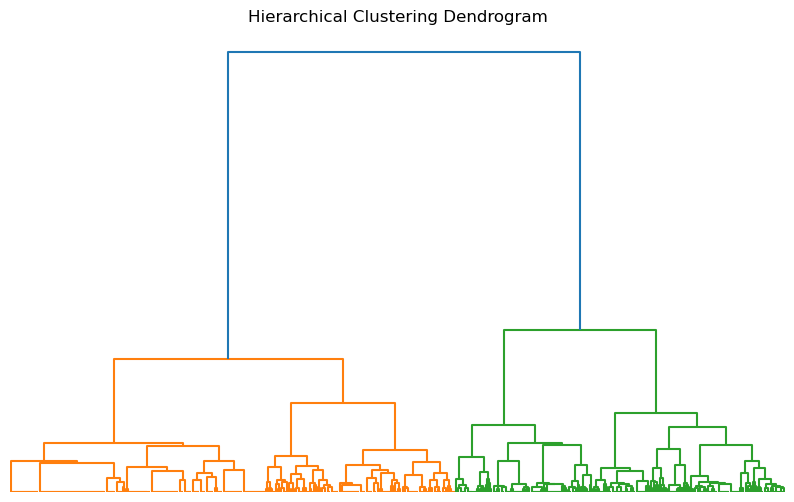

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram

# 계층적 군집화 수행
linkage_matrix = linkage(data, method='ward')

# 덴드로그램 그리기
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=df_2023['회사명'].values, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.axis('off')
plt.show()

크게 4개의 클러스터로 나뉘는 걸 알 수 있다

In [34]:
from sklearn.cluster import KMeans

# 클러스터링 수행
kmeans = KMeans(n_clusters=4)  # 클러스터 개수 설정
clusters = kmeans.fit_predict(data)

In [35]:
df_2023['클러스터'] = clusters

# 총 4가지의 군집을 볼 수 있다

In [38]:
df_2023[df_2023['클러스터'] == 0]

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease,클러스터
5,BYC,1.0,1.0,1.0,1.0,-2.0,0
22,DSR,1.0,1.0,2.0,1.0,-1.0,0
32,HDC랩스,1.0,1.0,1.0,1.0,-1.0,0
44,HLB글로벌,1.0,1.0,2.0,1.0,-1.0,0
55,KC그린홀딩스,1.0,1.0,1.0,2.0,-2.0,0
...,...,...,...,...,...,...,...
762,화인베스틸,1.0,2.0,1.0,1.0,-2.0,0
763,화천기계,1.0,1.0,1.0,1.0,-1.0,0
764,화천기공,1.0,1.0,1.0,2.0,-1.0,0
775,휴니드테크놀러지스,1.0,1.0,2.0,2.0,-1.0,0


In [39]:
df_2023[df_2023['클러스터'] == 1]

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease,클러스터
0,AJ네트웍스,3.5,2.0,3.5,3.5,0.5,1
1,AK홀딩스,3.5,3.0,5.0,3.0,0.0,1
2,BGF,3.5,5.0,4.5,3.0,0.0,1
6,CJ,3.5,3.5,5.0,3.5,-1.5,1
7,CJ CGV,3.5,3.0,3.5,3.5,-1.5,1
...,...,...,...,...,...,...,...
768,효성 ITX,3.5,3.0,5.0,3.5,0.0,1
773,후성,3.0,3.0,3.5,3.0,1.0,1
774,휠라홀딩스,3.5,3.0,5.0,3.5,0.0,1
776,휴비스,3.5,3.5,5.0,3.5,0.0,1


In [40]:
df_2023[df_2023['클러스터'] == 2]

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease,클러스터
3,BGF리테일,5.0,5.0,4.5,5.0,0.0,2
4,BNK금융지주,5.0,5.0,5.0,5.0,0.5,2
10,CJ제일제당,5.0,5.0,5.0,3.5,0.0,2
16,DGB금융지주,5.0,4.5,4.5,5.0,0.5,2
17,DL,5.0,5.0,4.5,5.0,1.5,2
...,...,...,...,...,...,...,...
756,호텔신라,5.0,3.5,5.0,5.0,0.0,2
769,효성중공업,5.0,5.0,4.5,3.5,0.0,2
770,효성첨단소재,5.0,3.5,4.5,5.0,0.5,2
771,효성티앤씨,5.0,5.0,4.5,3.5,0.5,2


In [41]:
df_2023[df_2023['클러스터'] == 3]

,회사명,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,increase_decrease,클러스터
9,CJ씨푸드,3.0,2.0,3.0,3.0,0.0,3
11,CS홀딩스,2.0,1.0,1.0,3.0,0.0,3
12,DB,3.0,1.0,3.0,3.5,0.0,3
13,DB금융투자,3.0,2.0,3.0,3.0,0.0,3
20,DN오토모티브,2.0,2.0,1.0,3.0,-1.0,3
...,...,...,...,...,...,...,...
759,화승인더스트리,2.0,2.0,2.0,3.5,-1.0,3
760,화승코퍼레이션,2.0,2.0,2.0,3.0,-1.5,3
765,환인제약,3.0,1.0,3.5,3.5,0.0,3
766,황금에스티,2.0,1.0,1.0,3.0,1.0,3


In [43]:
cluster_centers = kmeans.cluster_centers_

In [45]:
cluster_centers

array([[ 1.01162791,  1.12790698,  1.31782946,  1.29457364, -1.28294574],
       [ 3.29722222,  3.08888889,  4.28055556,  3.18333333, -0.06944444],
       [ 4.94444444,  4.41269841,  4.71428571,  4.50793651,  0.61904762],
       [ 2.125     ,  1.5625    ,  2.24537037,  2.56018519, -0.54398148]])

In [46]:
# 반올림하기
cluster_centers_rounded = np.round(cluster_centers, decimals=2)
cluster_centers_rounded

array([[ 1.01,  1.13,  1.32,  1.29, -1.28],
       [ 3.3 ,  3.09,  4.28,  3.18, -0.07],
       [ 4.94,  4.41,  4.71,  4.51,  0.62],
       [ 2.13,  1.56,  2.25,  2.56, -0.54]])

In [47]:
column_names = 'KCGS_종합등급', 'KCGS_환경', 'KCGS_사회', 'KCGS_지배구조', '증감'
cluster_centers_df = pd.DataFrame(cluster_centers_rounded, columns=column_names)
cluster_centers_df

,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,증감
0,1.01,1.13,1.32,1.29,-1.28
1,3.30,3.09,4.28,3.18,-0.07
2,4.94,4.41,4.71,4.51,0.62
3,2.13,1.56,2.25,2.56,-0.54


In [48]:
# 한글 오류 안 뜨게 하는 코드
import os
import matplotlib.pyplot as plt

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")

else:
    plt.rc("font", family="Malgun Gothic")
    
# - (마이너스) 안 깨지는 코드
plt.rcParams['axes.unicode_minus'] = False

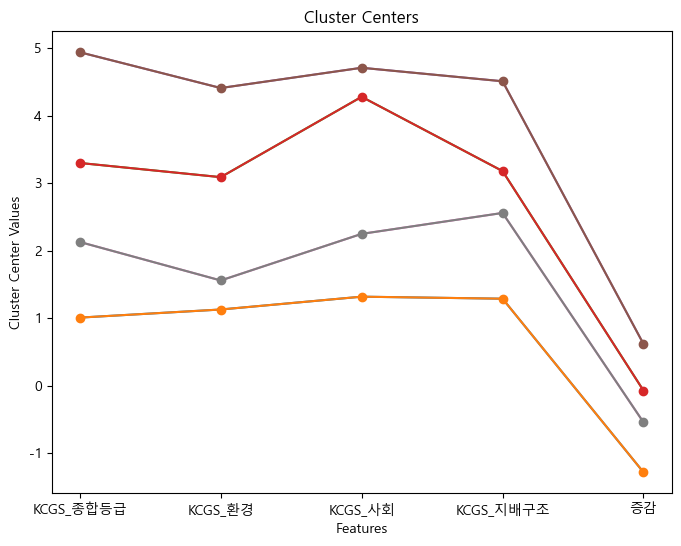

In [50]:
import matplotlib.pyplot as plt

# 점으로 시각화
plt.figure(figsize=(8, 6))
for i in range(len(cluster_centers_df)):
    plt.plot(range(len(cluster_centers_df.columns)), cluster_centers_df.iloc[i])
    plt.plot(range(len(cluster_centers_df.columns)), cluster_centers_df.iloc[i], '-o')
plt.xticks(range(len(cluster_centers_df.columns)), cluster_centers_df.columns)
plt.xlabel('Features')
plt.ylabel('Cluster Center Values')
plt.title('Cluster Centers')
plt.show()